In [1]:
import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from sklearn.metrics import accuracy_score
from keras.optimizers import SGD

In [2]:
from numba import jit

In [3]:
nc=10 # Number of classes

#CIFAR is an acronym that stands for the Canadian 
#Institute For Advanced Research and the CIFAR-10 
#dataset was developed along with the CIFAR-100 
#dataset by researchers at the CIFAR institute.
#The dataset is comprised of 50,000 32×32 
#pixel color photographs of objects from 10 classes, 
#such as frogs, birds, cats, ships, etc. 
#The class labels and their standard associated 
#integer values are listed below.
#0: airplane
#1: automobile
#2: bird
#3: cat
#4: deer
#5: dog
#6: frog
#7: horse
#8: ship
#9: truck

In [4]:
(Xtrain,ytrain),(Xtest,ytest)=cifar10.load_data()


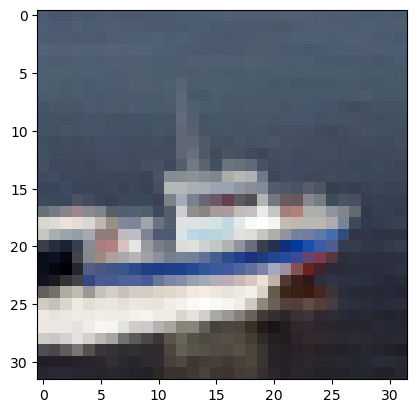

In [5]:
plt.figure(1)
imgplot1=plt.imshow(Xtrain[nr.randint(50000)])
plt.show()

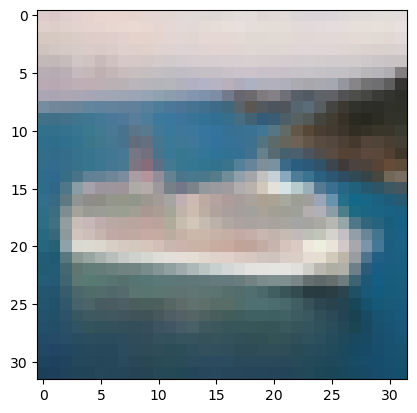

In [6]:
plt.figure(2)
imgplot1=plt.imshow(Xtrain[nr.randint(10000)])
plt.show()

In [7]:
Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain[0:20000,:] /255.0
Xtest=Xtest.astype('float32')
Xtest=Xtest/255.0
ytrainEnc=tf.one_hot(ytrain[0:20000,0],depth=nc)
ytestEnc=tf.one_hot(ytest[:,0],depth=nc)

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

In [9]:
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
#opt=SGD(lr=0.001,momentum=0.9)
opt=SGD(learning_rate=0.001,momentum=0.9)
model.compile(optimizer=opt , loss='categorical_crossentropy',metrics=['accuracy'])


In [10]:
history=model.fit(Xtrain,ytrainEnc,epochs=10,batch_size=550,validation_data=(Xtest,ytestEnc))
#epoch has to be 100 but have to run it in gpu and not cpu OR RUN ON GOOGLE COLAB(EASIER TO CHANGE TO GPU)

Epoch 1/10
37/37 [==============================] - 47s 1s/step - loss: 2.2400 - accuracy: 0.1759 - val_loss: 2.0936 - val_accuracy: 0.2541
Epoch 2/10
37/37 [==============================] - 44s 1s/step - loss: 2.0130 - accuracy: 0.2722 - val_loss: 1.9590 - val_accuracy: 0.2904
Epoch 3/10
37/37 [==============================] - 48s 1s/step - loss: 1.9151 - accuracy: 0.3128 - val_loss: 1.8864 - val_accuracy: 0.3087
Epoch 4/10
37/37 [==============================] - 43s 1s/step - loss: 1.8412 - accuracy: 0.3440 - val_loss: 1.8283 - val_accuracy: 0.3499
Epoch 5/10
37/37 [==============================] - 43s 1s/step - loss: 1.7732 - accuracy: 0.3695 - val_loss: 1.7701 - val_accuracy: 0.3693
Epoch 6/10
37/37 [==============================] - 43s 1s/step - loss: 1.7097 - accuracy: 0.3935 - val_loss: 1.6952 - val_accuracy: 0.4014
Epoch 7/10
37/37 [==============================] - 43s 1s/step - loss: 1.6676 - accuracy: 0.4024 - val_loss: 1.7172 - val_accuracy: 0.4024
Epoch 8/10
37/37 [==

In [11]:
ypred = model.predict(Xtest)
ypred = np.argmax(ypred,axis=1)
score = accuracy_score(ypred,ytest)
print('Accuracy score is',100*score,'%')

313/313 [==============================] - 7s 19ms/step
Accuracy score is 44.3 %


In [12]:
def visualize_predictions(model, Xtest, ytest, num_samples=5):
    # Generate random indices
    sample_indices = nr.randint(len(Xtest), size=num_samples)
    
    # Predictions
    predictions = model.predict(Xtest)
    predicted_labels = np.argmax(predictions, axis=1)
    
    plt.figure(figsize=(15, 10))
    for i, idx in enumerate(sample_indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(Xtest[idx])
        plt.axis('off')
        plt.title(f'True: {ytest[idx][0]}, Predicted: {predicted_labels[idx]}')
    plt.show()


313/313 [==============================] - 6s 19ms/step


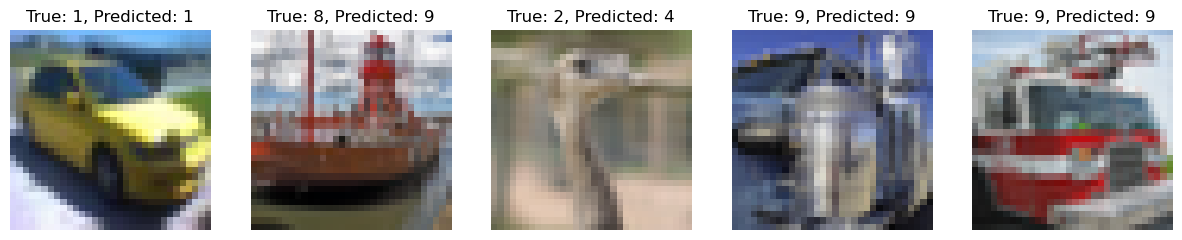

In [13]:
# Visualize predictions
visualize_predictions(model, Xtest, ytest)